https://matplotlib.org/stable/tutorials/colors/colormaps.html

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-04-08 12:36:54--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   282MB/s    in 0.3s    

2023-04-08 12:36:55 (282 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    

## **Load bioactivity data**

In [2]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

--2023-08-12 10:37:45--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385924 (377K) [text/plain]
Saving to: ‘acetylcholinesterase_03_bioactivity_data_curated.csv’

acetylcholinesteras 100%[===================>] 376.88K  --.-KB/s    in 0.04s   

2023-08-12 10:37:45 (9.80 MB/s) - ‘acetylcholinesterase_03_bioactivity_data_curated.csv’ saved [385924/385924]



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('AKT_bc_chem_final.csv')
df

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class
0,CHEMBL307152,Cn1ccc2ccc3c4[nH]c5c(CCCN[C@H]6CC[C@H](O)CC6)c...,494.595,4.67530,4,5,5.261219,inactive
1,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,291.354,3.62150,2,2,5.000000,inactive
2,CHEMBL3216643,COc1ccc(O)c(C(=O)c2ccc(C(=O)O[C@@H]3CCCNCC3NC(...,507.518,2.87330,3,8,8.301030,active
3,CHEMBL1202518,COc1ccc(O)c(C(=O)c2ccc(C(=O)N[C@@H]3CCCNCC3NC(...,506.534,2.44630,4,7,8.397940,active
4,CHEMBL1204097,COc1ccc(O)c(C(=O)c2ccc(NC[C@@H]3CCCNCC3NC(=O)c...,492.551,3.37600,4,7,4.602060,inactive
...,...,...,...,...,...,...,...,...
4948,50373623,C[C@@H](O)[C@H](NC(=O)[C@H](CCCN=C(N)N)NC(=O)[...,947.065,-5.76170,14,13,3.388277,inactive
4949,50373633,CC(C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](C)NC(=O)[...,1004.208,-2.61560,12,11,3.358526,inactive
4950,50373610,CC(C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@...,975.119,-5.12560,14,13,3.351640,inactive
4951,50747309,Cc1n[nH]c(N)c1-c1ccccc1,173.219,1.96732,2,2,3.180456,inactive


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [5]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

In [6]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

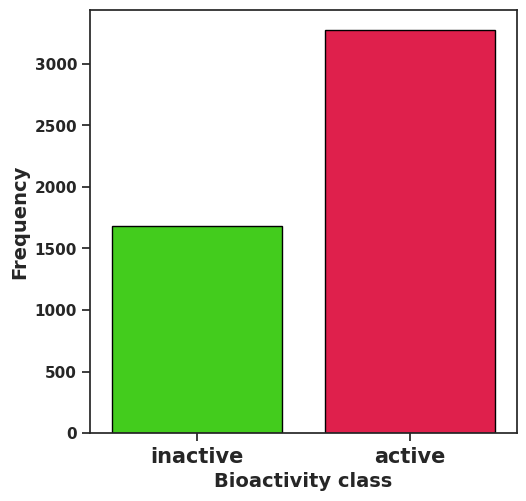

In [7]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df, edgecolor='black', palette="prism")


plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300


plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

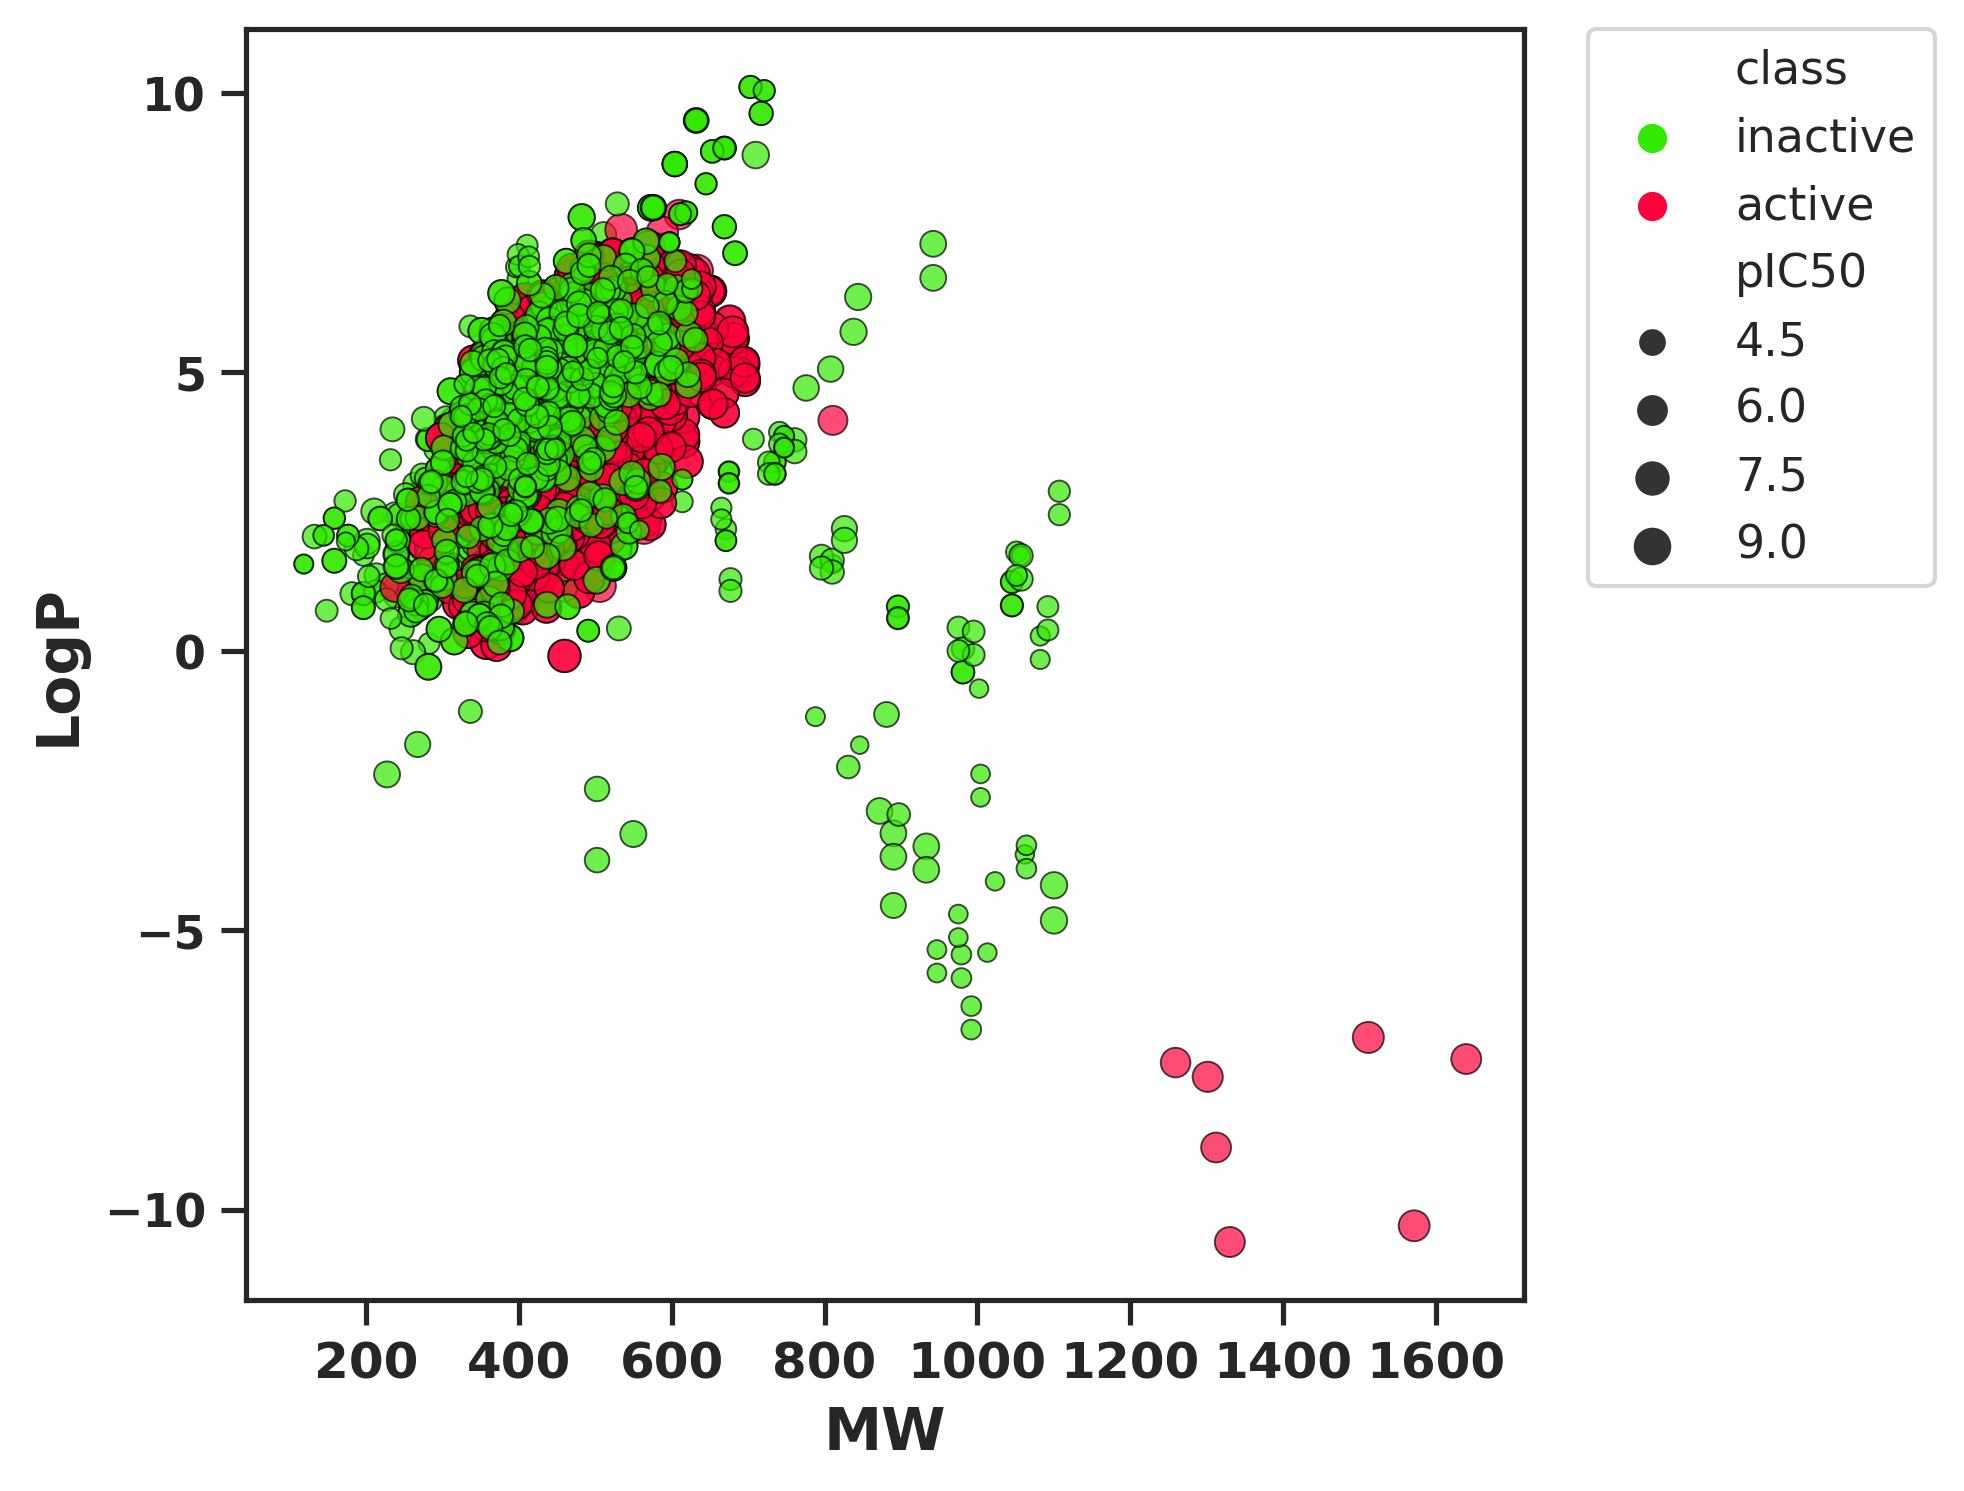

In [8]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df, hue='class', size='pIC50', edgecolor='black', palette = "prism", alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300


plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

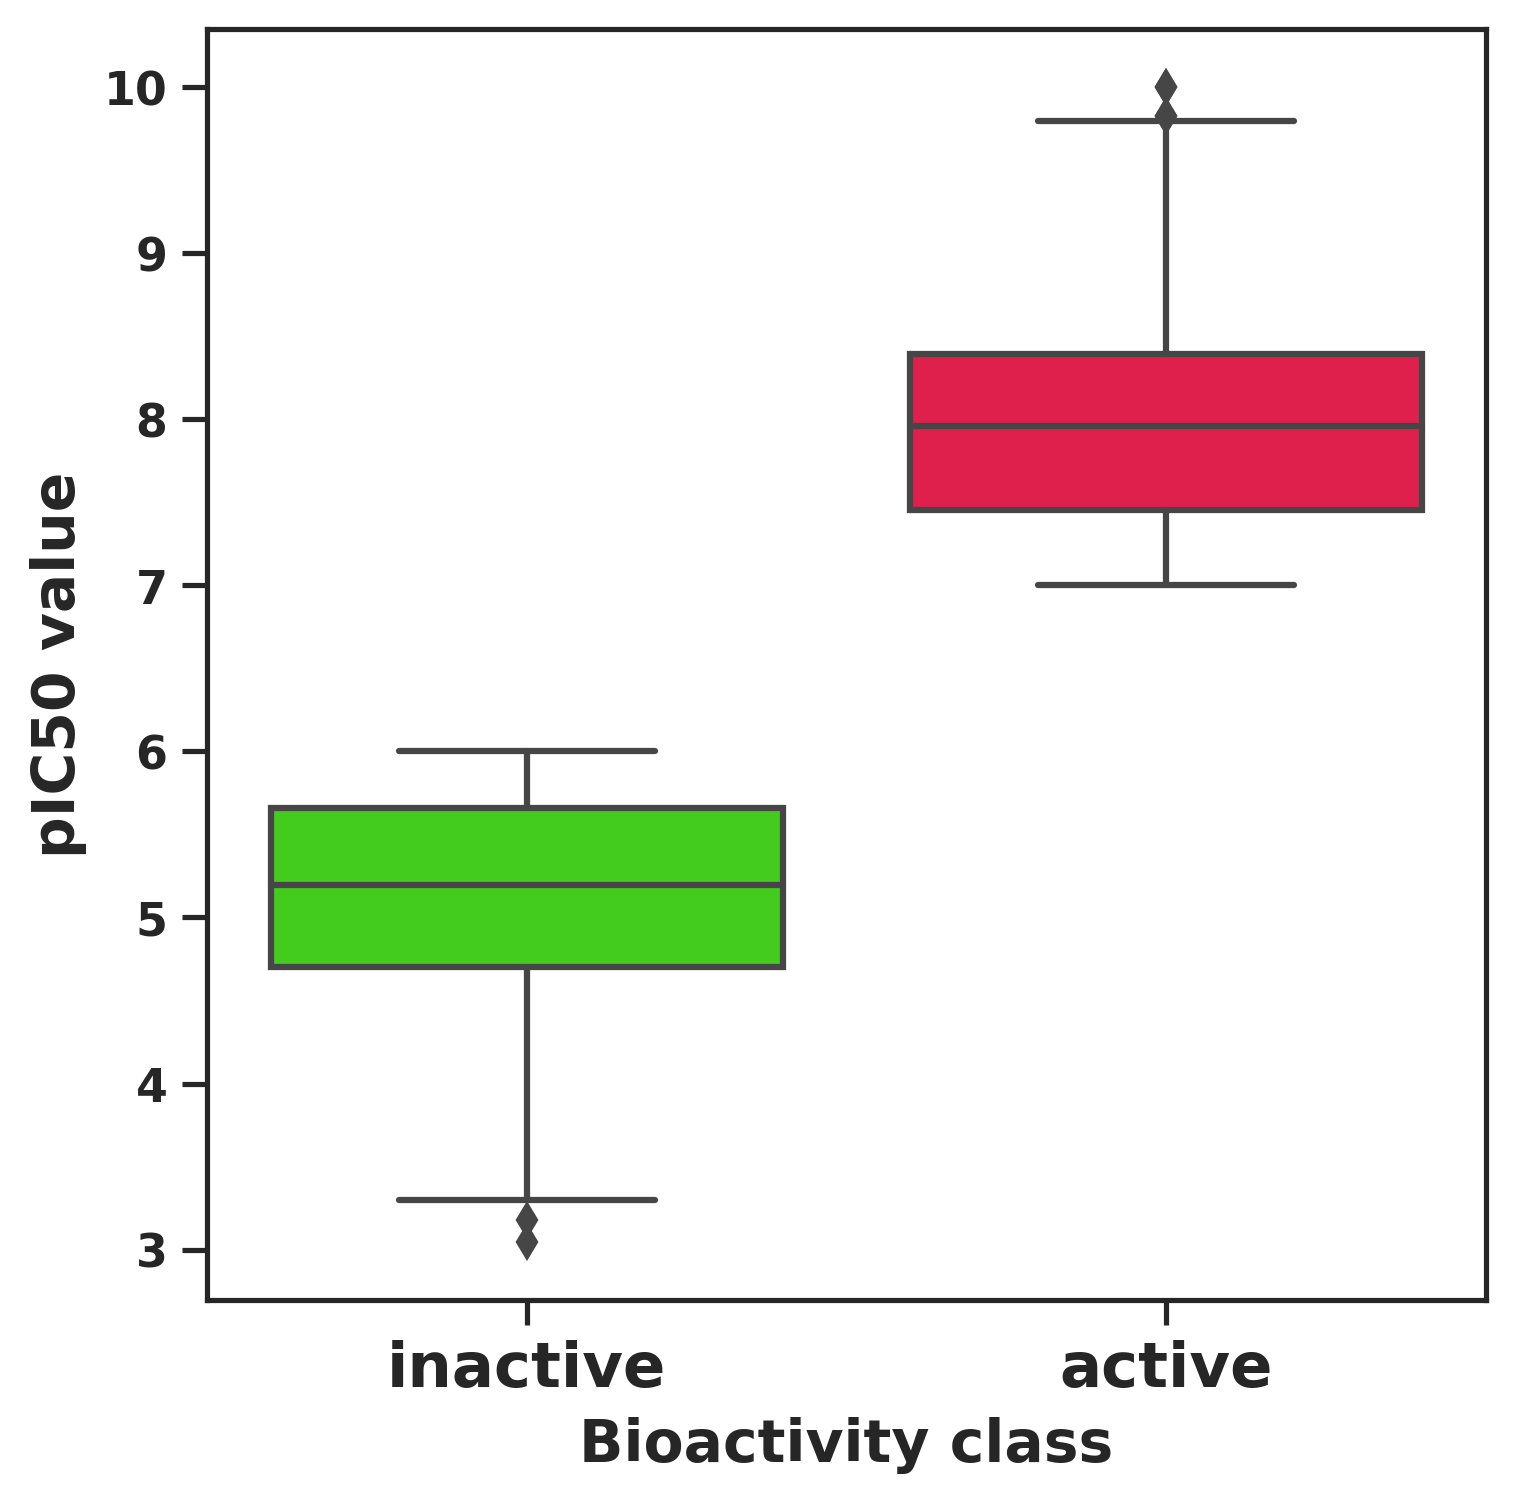

In [9]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df, palette="prism")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [10]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df1 = df[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df1 = df[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [11]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5497046.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

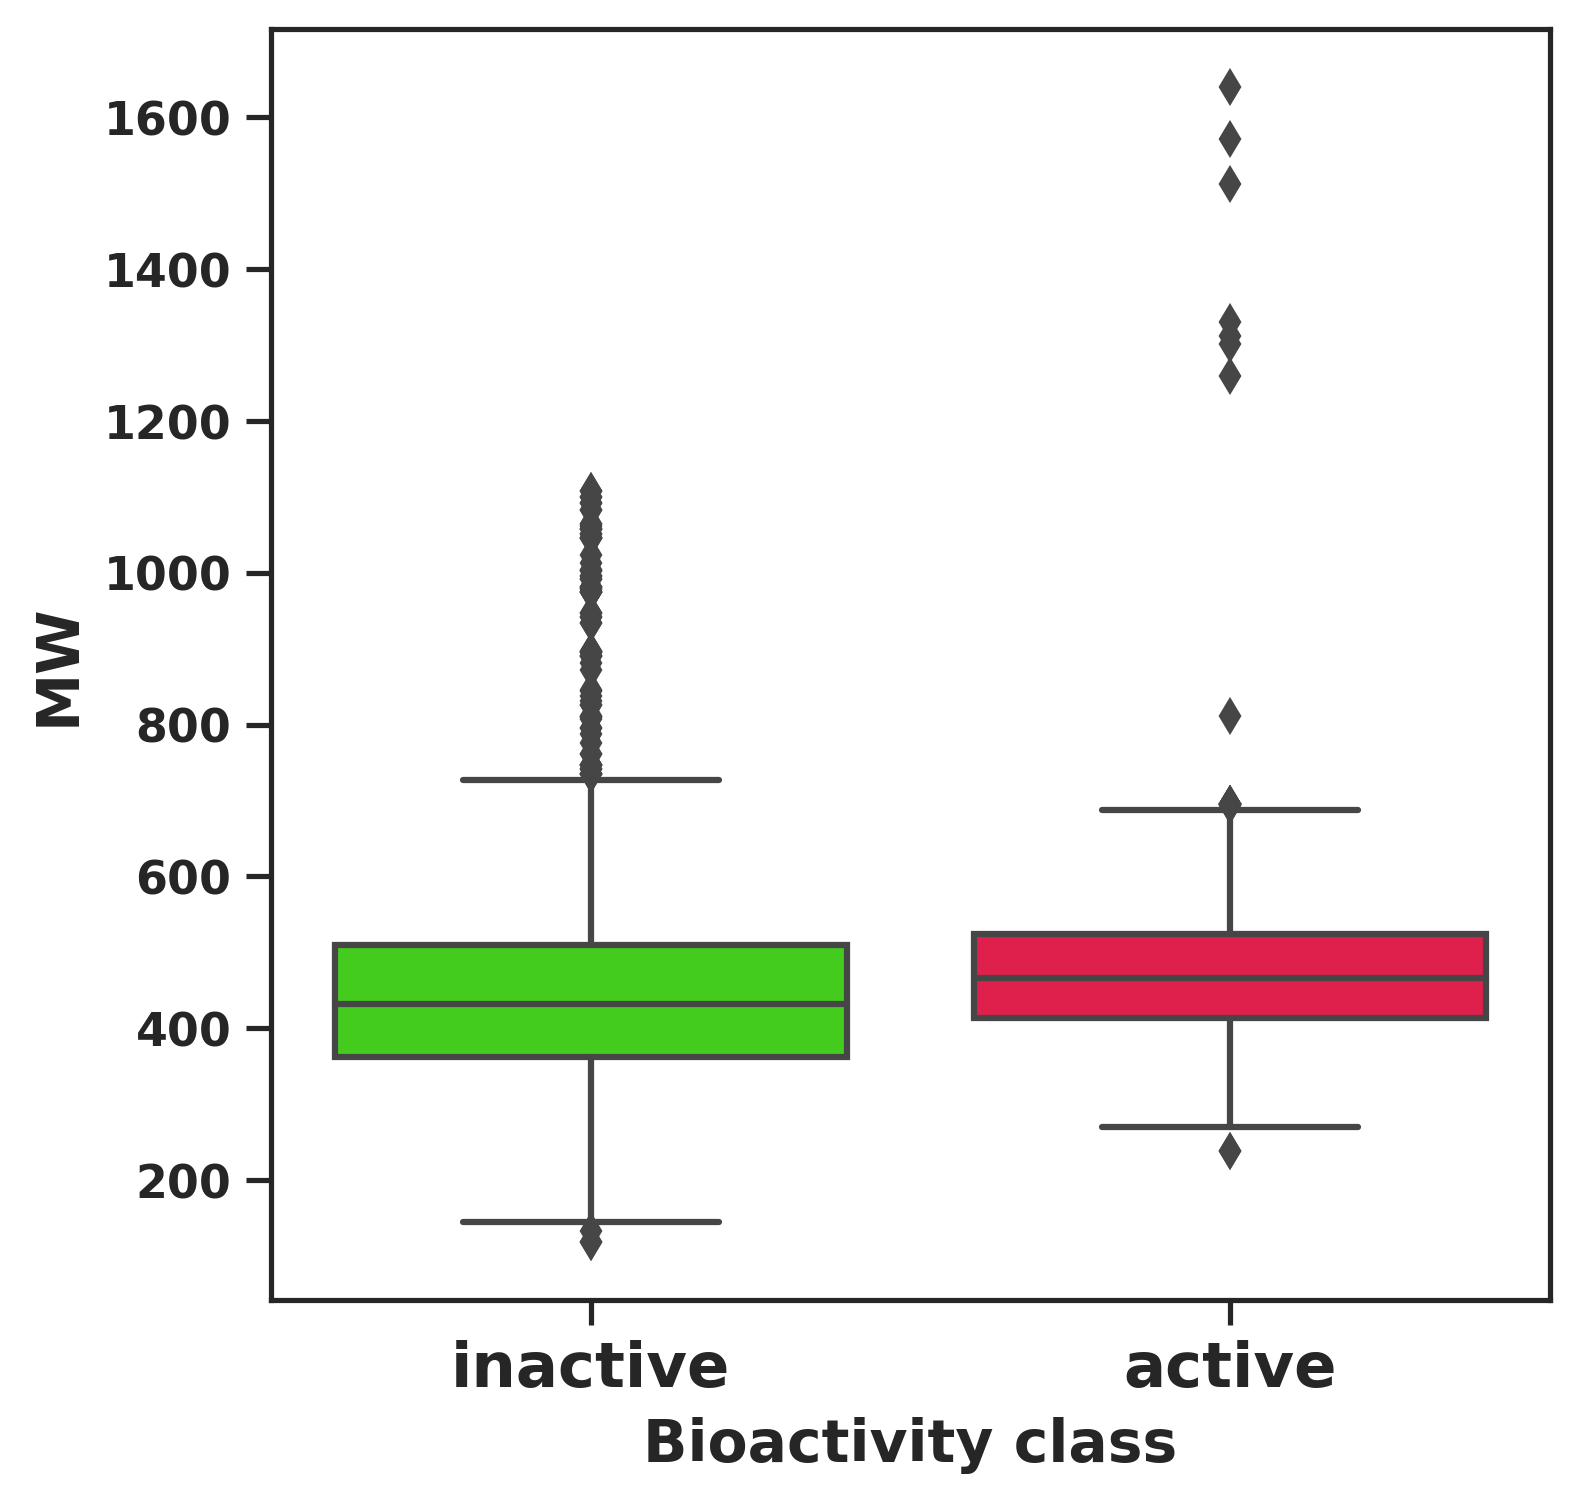

In [12]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df, palette="prism")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300

plt.savefig('plot_MW.pdf')

In [13]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3338064.0,3.548037e-35,0.05,Different distribution (reject H0)


#### **LogP**

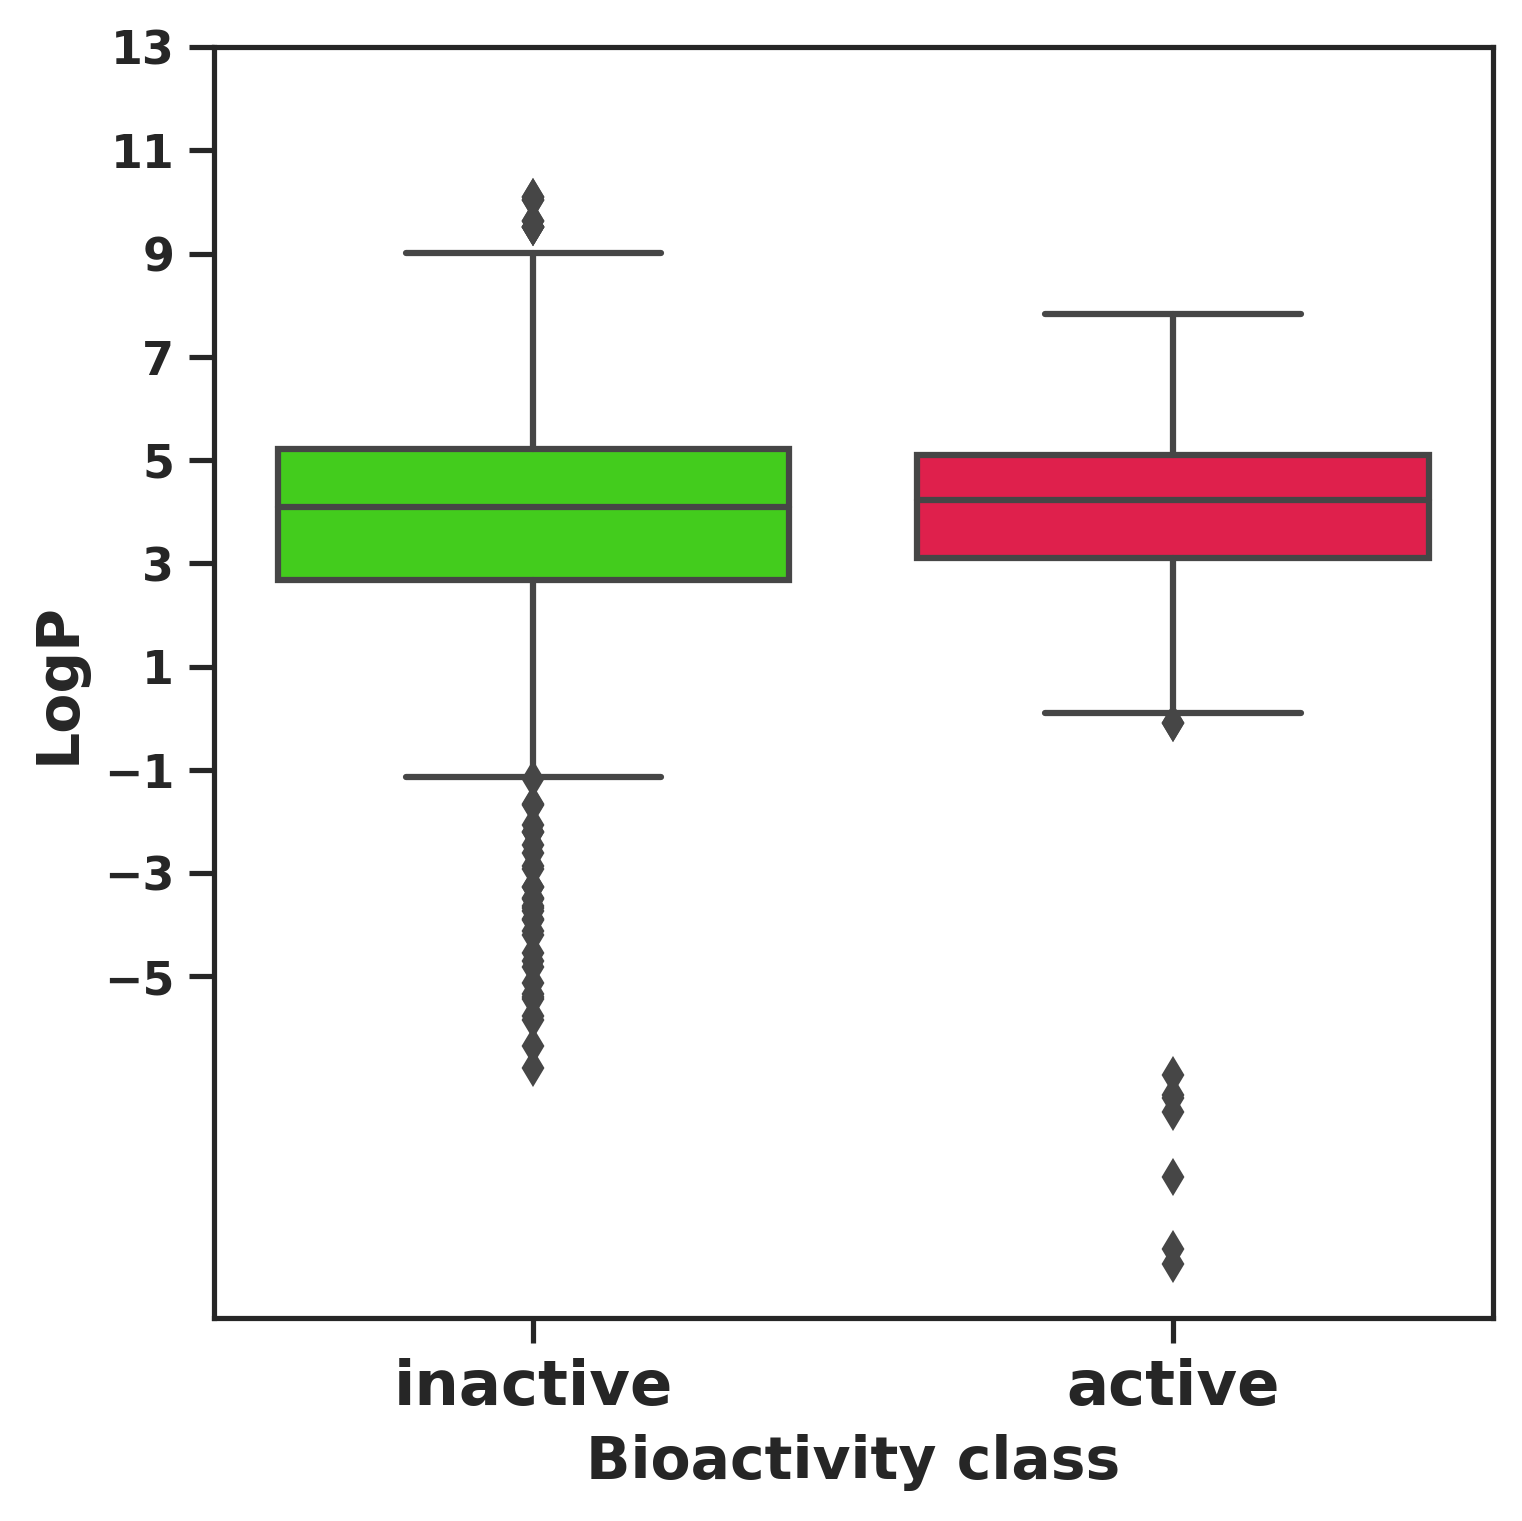

In [14]:
import numpy as np
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df, palette="prism")


listOf_yticks = np.arange(-5, 15, 2)
plt.yticks(listOf_yticks)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [15]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2843052.0,0.047221,0.05,Different distribution (reject H0)


#### **NumHDonors**

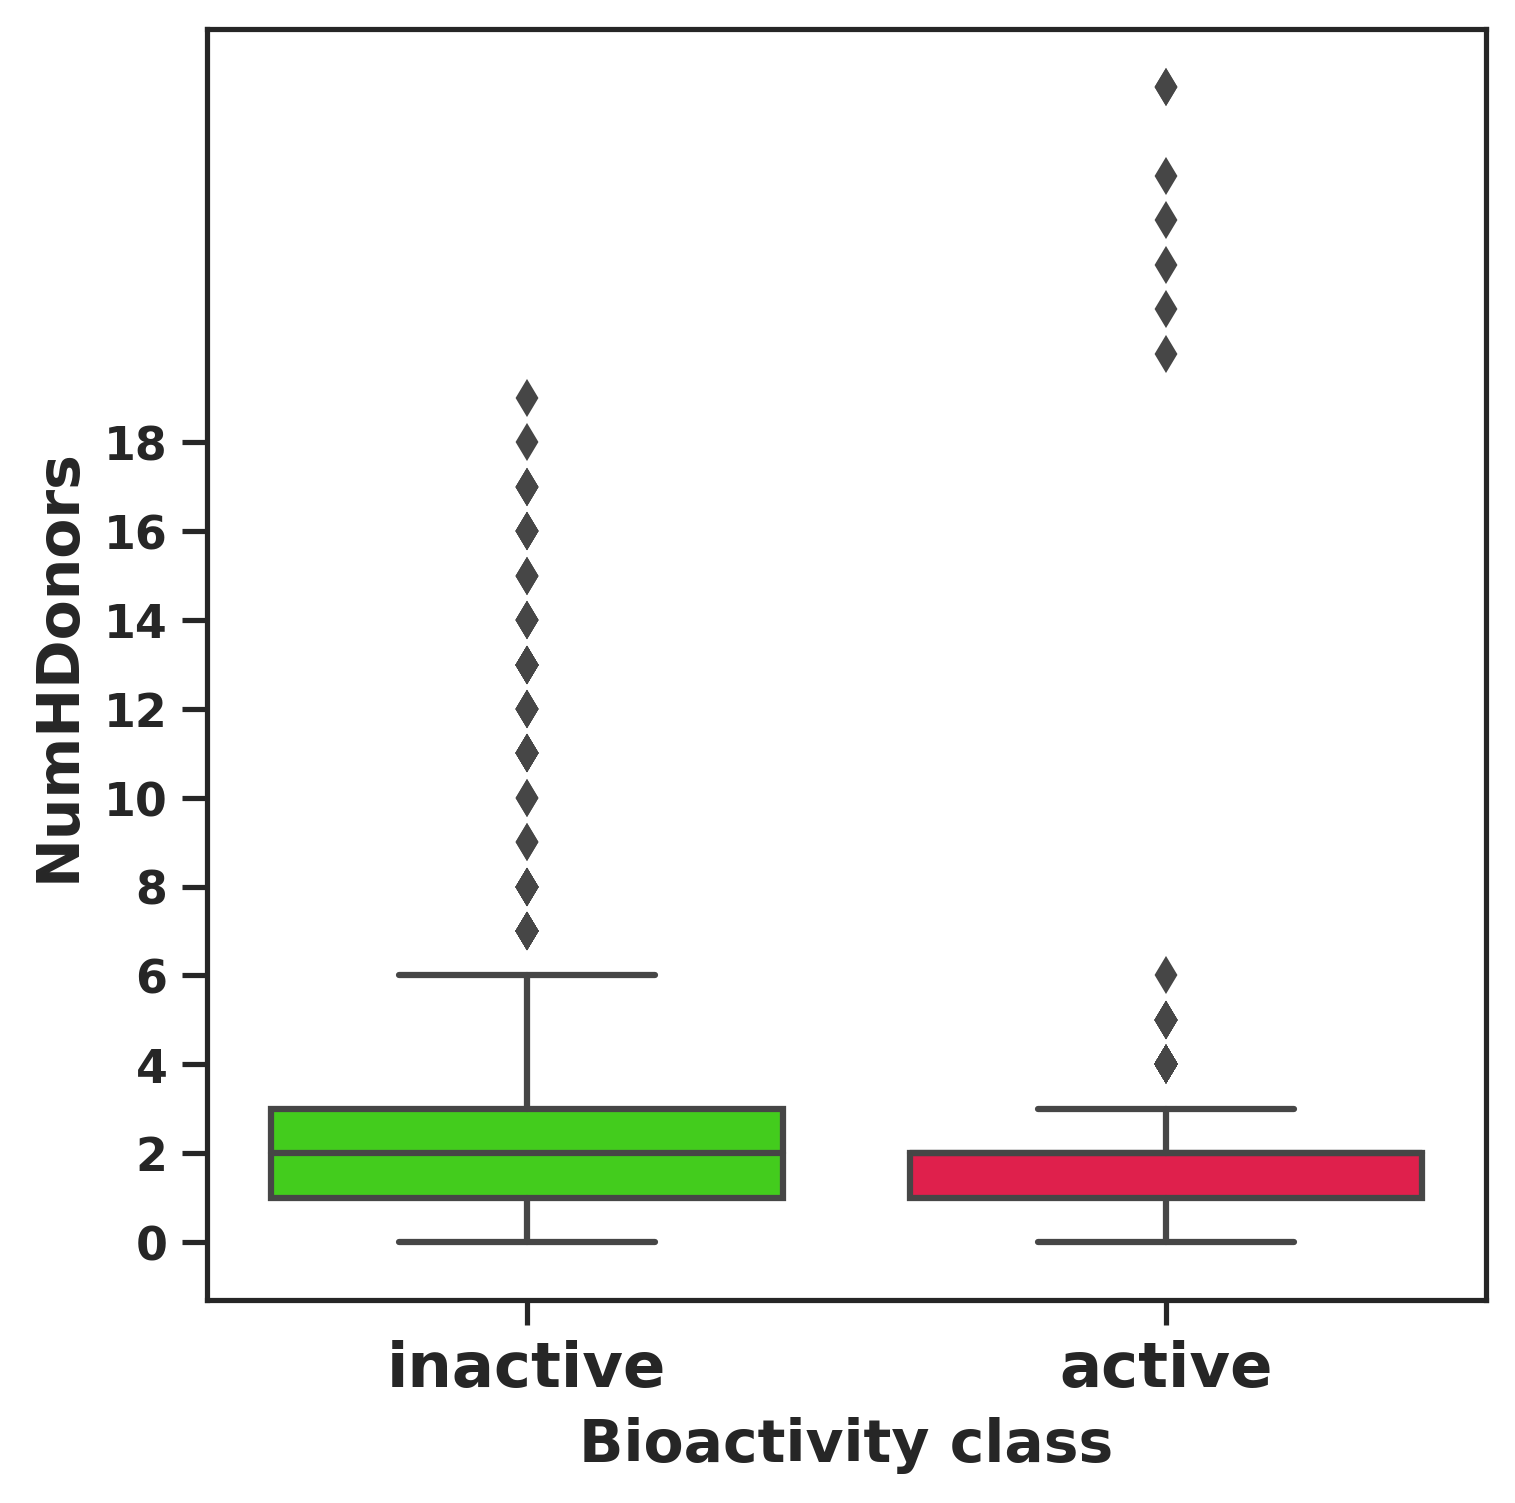

In [16]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df, palette="prism")

listOf_yticks = np.arange(0, 20, 2)
plt.yticks(listOf_yticks)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
listOf_yticks = np.arange(0, 20, 2)
listOf_yticks
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [17]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2638428.5,0.014769,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

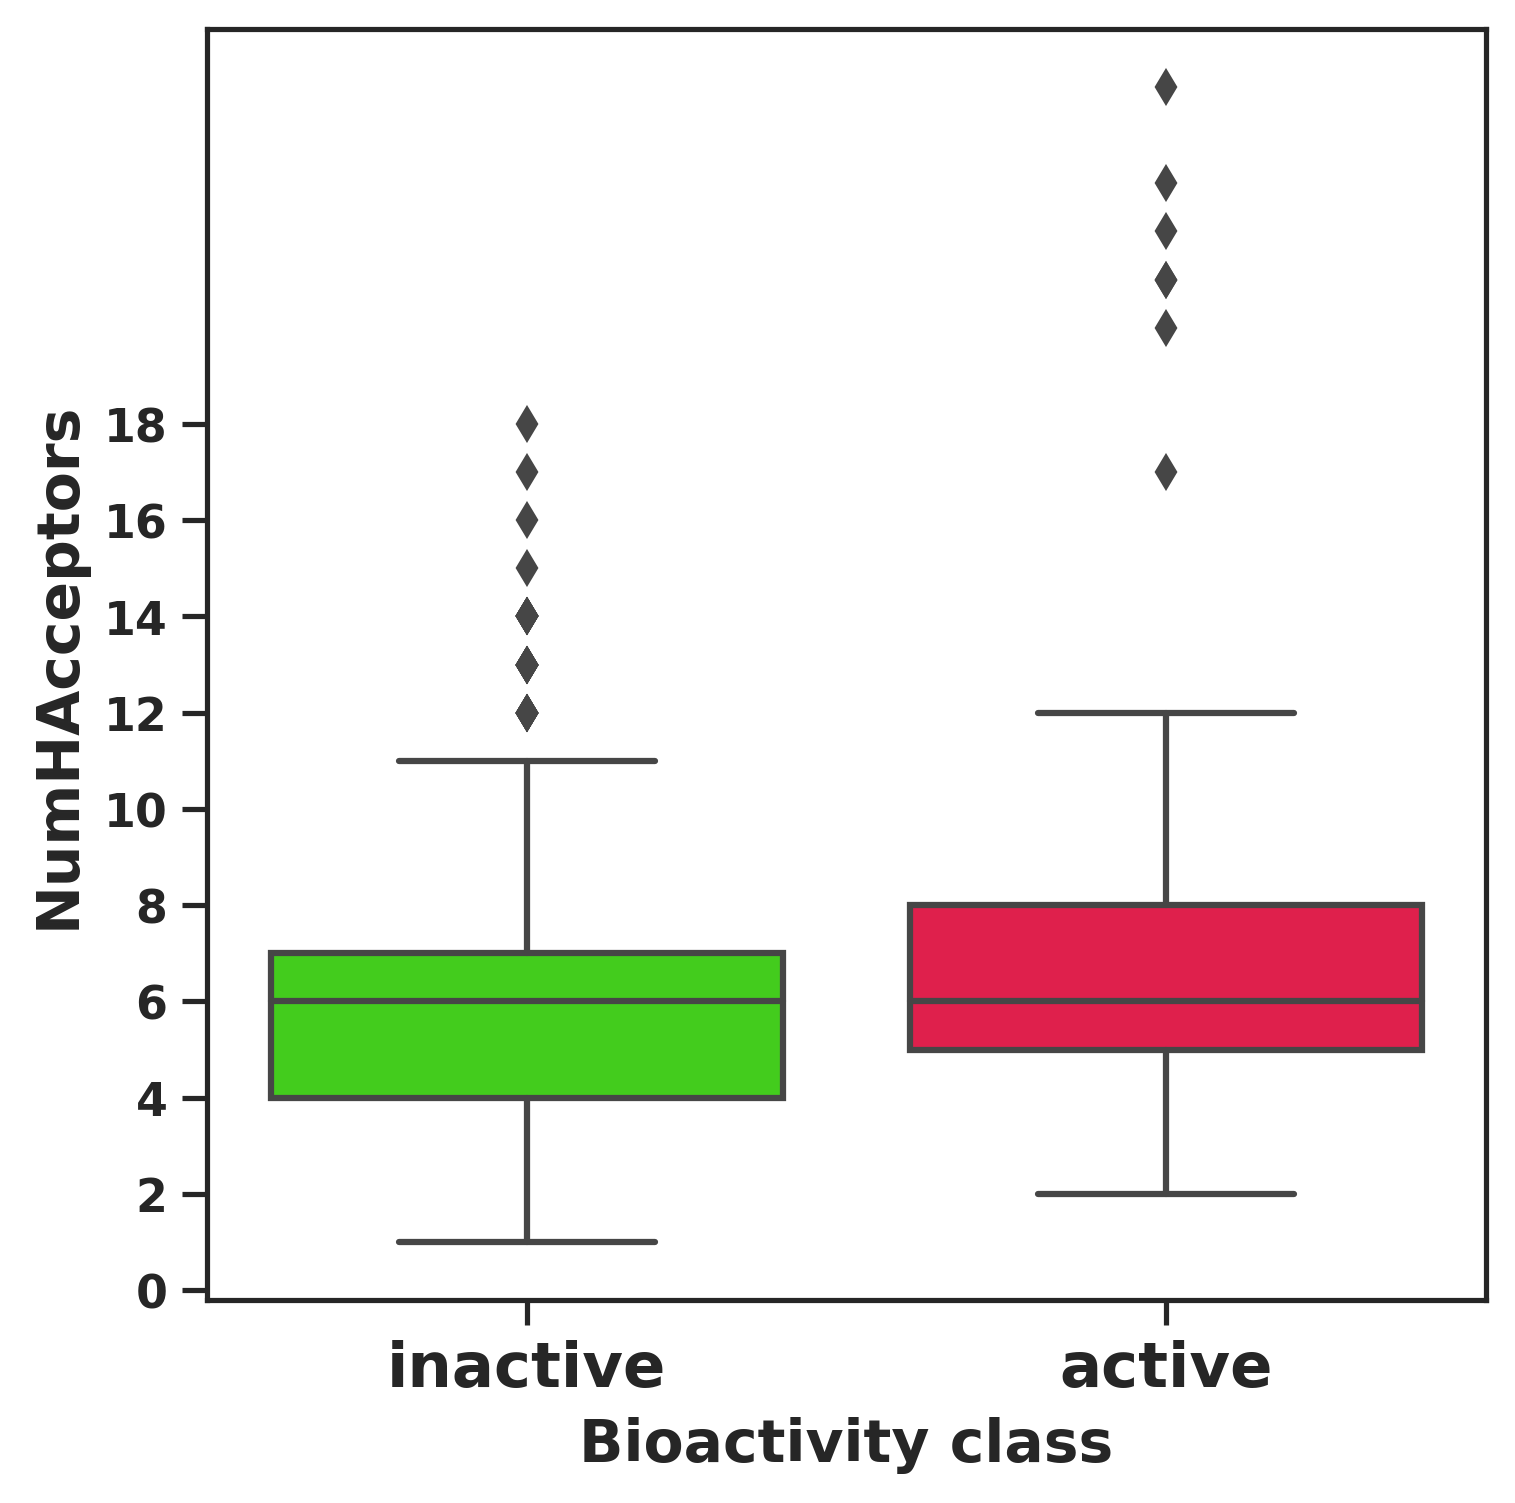

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df, palette="prism")
listOf_yticks = np.arange(0, 20, 2)
plt.yticks(listOf_yticks)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300

plt.savefig('plot_NumHAcceptors.pdf')

In [19]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3253118.0,6.920308e-27,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: BD_chem.csv (deflated 78%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: AKT10.csv (deflated 78%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 33%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 34%)
  adding: plot_MW.pdf (deflated 32%)
  adding: plot_LogP.pdf (deflated 34%)
  adding: plot_NumHAcceptors.pdf (deflated 34%)
  adding: plot_ic50.pdf (deflated 32%)
